# Advanced geospatial plotting 

In [69]:
import pandas as pd
import os
from keplergl import KeplerGl
from pyproj import CRS
import numpy as np
from matplotlib import pyplot as plt

In [70]:
%%capture
import warnings
warnings.filterwarnings("ignore")

In [71]:
df = pd.read_csv('Data/output/newyork_data.csv')

## Data preprocessing

In [73]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [74]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'date', 'avgTemp', '_merge', 'value',
       'bike_rides_daily', 'merge_flag', 'trip_duration'],
      dtype='object')

In [75]:
# Create a value column and group by start and end station 

df['value'] = 1
df_group = df.groupby(['start_station_name', 'end_station_name'])['value'].count().reset_index()

In [76]:
df_group

,start_station_name,end_station_name,value
0,1 Ave & E 110 St,1 Ave & E 110 St,44
1,1 Ave & E 110 St,1 Ave & E 44 St,1
2,1 Ave & E 110 St,1 Ave & E 62 St,7
3,1 Ave & E 110 St,1 Ave & E 68 St,14
4,1 Ave & E 110 St,1 Ave & E 78 St,3
...,...,...,...
467007,Yankee Ferry Terminal,Pioneer St & Van Brunt St,3
467008,Yankee Ferry Terminal,Soissons Landing,331
467009,Yankee Ferry Terminal,South St & Gouverneur Ln,1
467010,Yankee Ferry Terminal,South St & Whitehall St,1


In [77]:
print(df_group['value'].sum())
print(df.shape)

3996025
(4000000, 20)


In [78]:
df_group['value'].describe()

count    467012.000000
mean          8.556579
std          21.996277
min           1.000000
25%           1.000000
50%           2.000000
75%           7.000000
max        1682.000000
Name: value, dtype: float64

### Some exploratory analysis into the trips

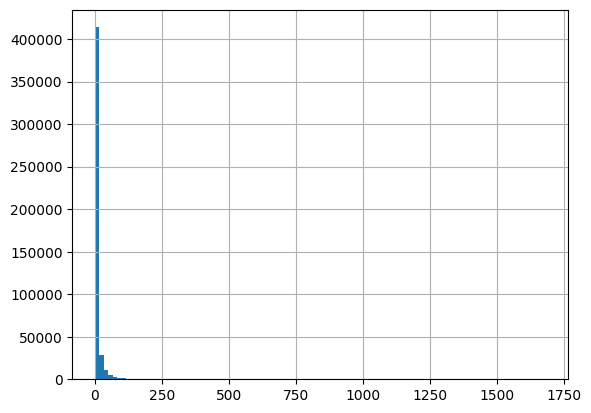

In [80]:
df_group['value'].hist(bins = 100)
plt.show()

[]

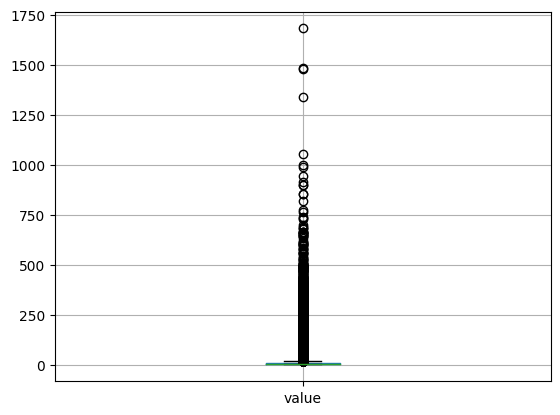

In [81]:
b_plot = df_group.boxplot(column = 'value') 
b_plot.plot()

In [82]:
df_group['value'].sort_index().value_counts()

1       169753
2        70592
3        40513
4        27276
5        20008
         ...  
523          1
619          1
461          1
913          1
1484         1
Name: value, Length: 500, dtype: int64

In [83]:
df_group.to_csv('Data/output/df_groupby_final.csv')

In [84]:
df_group.head()

,start_station_name,end_station_name,value
0,1 Ave & E 110 St,1 Ave & E 110 St,44
1,1 Ave & E 110 St,1 Ave & E 44 St,1
2,1 Ave & E 110 St,1 Ave & E 62 St,7
3,1 Ave & E 110 St,1 Ave & E 68 St,14
4,1 Ave & E 110 St,1 Ave & E 78 St,3


In [85]:
df_group.rename(columns = {'value': 'trips'}, inplace = True)

In [86]:
df_group.head()

,start_station_name,end_station_name,trips
0,1 Ave & E 110 St,1 Ave & E 110 St,44
1,1 Ave & E 110 St,1 Ave & E 44 St,1
2,1 Ave & E 110 St,1 Ave & E 62 St,7
3,1 Ave & E 110 St,1 Ave & E 68 St,14
4,1 Ave & E 110 St,1 Ave & E 78 St,3


In [87]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,avgTemp,_merge,value,bike_rides_daily,merge_flag,trip_duration
0,70F3BA79664016C1,classic_bike,2022-02-28 09:22:49.821,2022-02-28 09:28:55.174,9 Ave & W 18 St,6190.08,Greenwich Ave & Charles St,5914.08,40.743174,-74.003664,40.735238,-74.000271,member,2022-02-28,0.8,both,1,37930,both,6.089217
1,A17A13BC93E70054,classic_bike,2022-02-28 15:54:32.180,2022-02-28 15:58:19.524,McGuinness Blvd & Eagle St,5977.01,Greenpoint Ave & Manhattan Ave,5785.05,40.735550,-73.952840,40.730260,-73.953940,member,2022-02-28,0.8,both,1,37930,both,3.789067
2,A40EA69F1AAAF8F1,classic_bike,2022-02-28 17:18:11.965,2022-02-28 17:39:10.532,W 42 St & 6 Ave,6517.08,Central Park West & W 76 St,7253.04,40.754920,-73.984550,40.778968,-73.973747,member,2022-02-28,0.8,both,1,37930,both,20.976117
3,8181BFC7CD2D0D29,classic_bike,2022-02-28 23:20:15.894,2022-02-28 23:26:45.175,W 18 St & 6 Ave,6064.08,Lexington Ave & E 26 St,6089.08,40.739713,-73.994564,40.741459,-73.983293,member,2022-02-28,0.8,both,1,37930,both,6.488017
4,9264124038B95E9A,classic_bike,2022-02-28 12:36:09.524,2022-02-28 12:58:10.084,E 4 St & 2 Ave,5593.04,William St & Pine St,5065.12,40.726281,-73.989780,40.707179,-74.008873,member,2022-02-28,0.8,both,1,37930,both,22.009333


## PLot the map

In [89]:
print(list(df.columns))

['ride_id', 'rideable_type', 'started_at', 'ended_at', 'start_station_name', 'start_station_id', 'end_station_name', 'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng', 'member_casual', 'date', 'avgTemp', '_merge', 'value', 'bike_rides_daily', 'merge_flag', 'trip_duration']


In [90]:
# Define df_final with selected columns
df_final = df[['start_station_name','end_station_name','bike_rides_daily','start_lat', 'start_lng', 'end_lat', 'end_lng']]

# Display the first few rows to verify
print(df_final.head())


           start_station_name                end_station_name  \
0             9 Ave & W 18 St      Greenwich Ave & Charles St   
1  McGuinness Blvd & Eagle St  Greenpoint Ave & Manhattan Ave   
2             W 42 St & 6 Ave     Central Park West & W 76 St   
3             W 18 St & 6 Ave         Lexington Ave & E 26 St   
4              E 4 St & 2 Ave            William St & Pine St   

   bike_rides_daily  start_lat  start_lng    end_lat    end_lng  
0             37930  40.743174 -74.003664  40.735238 -74.000271  
1             37930  40.735550 -73.952840  40.730260 -73.953940  
2             37930  40.754920 -73.984550  40.778968 -73.973747  
3             37930  40.739713 -73.994564  40.741459 -73.983293  
4             37930  40.726281 -73.989780  40.707179 -74.008873  


In [91]:
# Create KeplerGl instance

from keplergl import KeplerGl

# Create a KeplerGl instance and pass the required columns directly
m = KeplerGl(height=700, data={"bike_routes": df_final.head(1000)})


User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


In [92]:
# df_final.head(1000) for shorter data

In [93]:
#Display map
m

KeplerGl(data={'bike_routes':               start_station_name                end_station_name  \
0           …

In [94]:
config = m.config
config

{}

In [95]:
# saving the json file after the map manual modification
import json
with open("config.json", "w") as outfile:
    json.dump(config, outfile)

In [96]:
# for reading the config.json file (presaved file)
with open('config.json') as f:
      config = json.load(f)

In [97]:
m.config = config

In [98]:
m

KeplerGl(data={'bike_routes':               start_station_name                end_station_name  \
0           …

### First, each line shows a trip between two stations. When you hover over a particular line, it’s easy to decipher which stations are “start” stations and which are “end" stations. It’s also easier to see the “trips(bike_daily_rides)” variable created in the groupby function when the data was preprocessed for plotting. This “trips” variable is the most important aspect of the analysis so far! Lastly, you can change the color palette to show where most of the trips started and where they ended. This makes the map more visually appealing and intuitive to interpret.

In [100]:
m.save_to_html(file_name = 'Citi_Bike_TripsAggregated.html', read_only = False, config = config)

Map saved to Citi_Bike_TripsAggregated.html!


In [101]:
config

{}